<a href="https://colab.research.google.com/github/sarahalayan/Business_Analytics_with_Excel/blob/main/Copy_of_Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [1]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [2]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification


Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
data_path = "/content/machine_learning_certification/Challenge 7/"


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [4]:
#Test Your Zaka (English)
english=pd.read_csv(data_path+"en.csv",header=None)
english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [5]:
#Test Your Zaka (French)
french=pd.read_csv(data_path+"fr.csv",header=None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [6]:
#Test Your Zaka
print("The english dataset contains: " + str(english.shape[0]) + " sentences")
print("The french dataset contains: " + str(french.shape[0]) + " sentences")

The english dataset contains: 137860 sentences
The french dataset contains: 137860 sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [7]:
#Test Your Zaka
df=pd.concat([english,french],axis=1)
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [8]:
#Test Your Zaka
df.columns=["English","French"]
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [9]:
#Test Your Zaka
print(df.iloc[0,0])
print(df.iloc[0,1])

new jersey is sometimes quiet during autumn , and it is snowy in april .
new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [10]:
#Test Your Zaka
df.replace("[^\w\s]", "", regex=True, inplace=True)


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [11]:
#Test Your Zaka
print(df.iloc[0,0])
print(df.iloc[0,1])

new jersey is sometimes quiet during autumn  and it is snowy in april 
new jersey est parfois calme pendant l automne  et il est neigeux en avril 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [12]:
#Test Your Zaka
df["ENG Length"]=df["English"].str.split().str.len()
df["FR Length"]=df["French"].str.split().str.len()
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

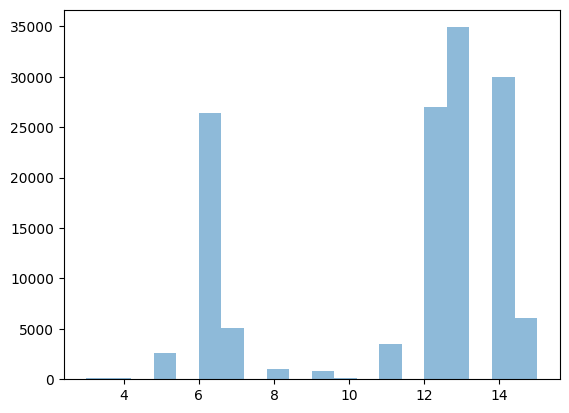

In [13]:
#Test Your Zaka
import matplotlib.pyplot as plt
plt.hist(df["ENG Length"], bins=20, alpha=0.5, label='English')
plt.show()

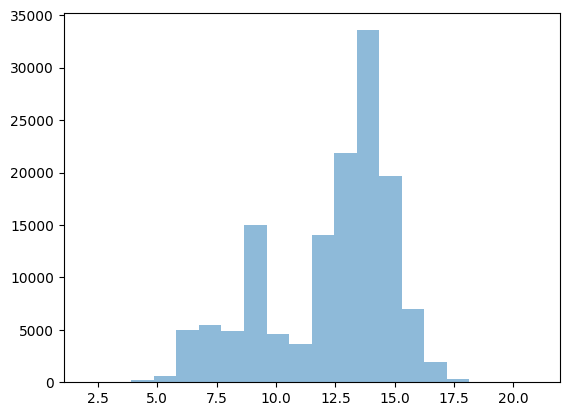

In [14]:
#Test Your Zaka
plt.hist(df["FR Length"], bins=20, alpha=0.5, label='French')
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [15]:
#Test Your Zaka
max_eng_len=df["ENG Length"].max()
max_fr_len=df["FR Length"].max()
print("maximum length of an english sentence is " + str(max_eng_len))
print("maximum length of a french sentence is " + str(max_fr_len))

maximum length of an english sentence is 15
maximum length of a french sentence is 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False

Tokenize the sentences that we have.

In [16]:
#Test Your Zaka
from tensorflow.keras.preprocessing.text import Tokenizer
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df["English"])


fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(df["French"])


**How many unique words do we have in english and in french?**

In [17]:
#Test Your Zaka
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fr_vocab_size = len(fr_tokenizer.word_index) + 1
print("The english dataset contains: " + str(eng_vocab_size) + " unique words")
print("The french dataset contains: " + str(fr_vocab_size) + " unique words")

The english dataset contains: 200 unique words
The french dataset contains: 345 unique words


####Padding

**What should be the length of the sequences that we have after padding?**

equal to the maximum length of a sentence

Perform padding on the sequences that we have.

In [18]:
#Test Your Zaka
from tensorflow.keras.preprocessing.sequence import pad_sequences
eng_sequences = eng_tokenizer.texts_to_sequences(df["English"])
eng_padded_sequences = pad_sequences(eng_sequences, maxlen=max_eng_len, padding="post")

fr_sequences = fr_tokenizer.texts_to_sequences(df["French"])
fr_padded_sequences = pad_sequences(fr_sequences, maxlen=max_fr_len, padding="post")

print(eng_padded_sequences.shape)
print(fr_padded_sequences.shape)

(137860, 15)
(137860, 21)


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [19]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed

#a basic Seq2Seq model with an encoder-decoder architecture:
#The encoder (Embedding + LSTM) processes the input English sentences and extracts relevant information.
#The decoder (RepeatVector + LSTM + TimeDistributed Dense) generates the corresponding French sentences
model=Sequential()
#mask_zero=True:allows the model to ignore padding zeros during training.
model.add(Embedding(eng_vocab_size, 256,  mask_zero=True))
model.add(LSTM(256))#To capture the sequential dependencies within the English sentences.
model.add(RepeatVector(max_fr_len))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab_size, activation='softmax')))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.build(input_shape=(None, max_eng_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 15, 256)             │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 21, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 21, 345)             │          88,665 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,190,489 (4.54 MB)

 Trainable params: 1,190,489 (4.54 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [21]:
#Test Your Zaka
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(eng_padded_sequences, fr_padded_sequences, epochs=20, batch_size=256, validation_split=0.2, callbacks=early_stopping)

Epoch 1/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4845 - loss: 2.6161 - val_accuracy: 0.6287 - val_loss: 1.3336
Epoch 2/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6652 - loss: 1.1790 - val_accuracy: 0.7428 - val_loss: 0.8794
Epoch 3/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7793 - loss: 0.7690 - val_accuracy: 0.8338 - val_loss: 0.5778
Epoch 4/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8488 - loss: 0.5237 - val_accuracy: 0.8882 - val_loss: 0.3856
Epoch 5/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8988 - loss: 0.3531 - val_accuracy: 0.9273 - val_loss: 0.2660
Epoch 6/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9330 - loss: 0.2461 - val_accuracy: 0.9423 - val_loss: 0.2103
Epoch 7/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9498 - loss: 0.1841 - val_accuracy: 0.9492 - val_loss: 0.1841
Epoch 8/20
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9593 - loss: 0.1468 - v

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [22]:
#Test Your Zaka
def translate_sentence(sentence):
    sentence = eng_tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_eng_len, padding="post")
    prediction = model.predict(sentence)
    prediction = np.argmax(prediction, axis=-1)
    translated_sentence = fr_tokenizer.sequences_to_texts(prediction)[0]
    return translated_sentence

Test the following sentence

In [23]:
input = "she is driving the truck"

#Test Your Zaka
print("english: ")
print(input)
print("french: ")
print("Elle conduit le camion.")
print("translated")
print(translate_sentence(input))

english: 
she is driving the truck
french: 
Elle conduit le camion.
translated
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
elle conduit le camion rouge


In [24]:

model.save('my_model.keras')

In [25]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [26]:
# prompt: how to use gradio

import gradio as gr

# ... (Your existing code) ...

def translate_sentence(sentence):
    sentence = eng_tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_eng_len, padding="post")
    prediction = model.predict(sentence)
    prediction = np.argmax(prediction, axis=-1)
    translated_sentence = fr_tokenizer.sequences_to_texts(prediction)[0]
    return translated_sentence

iface = gr.Interface(
    fn=translate_sentence,
    inputs=gr.Textbox(lines=2, placeholder="Enter an English sentence here..."),
    outputs="text",
    title="English to French Translator",
    description="Translate English sentences to French using a Seq2Seq model.",
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://21912110ed95deaa89.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [29]:
from flask import Flask, render_template, request
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

app = Flask(__name__)

# Load the pre-trained model and tokenizer
try:
    model = load_model('my_model.keras')  # Make sure the path is correct

    eng_tokenizer = eng_tokenizer
    fr_tokenizer = fr_tokenizer
    max_eng_len = max_eng_len
    max_fr_len = max_fr_len
except Exception as e:
    print(f"Error loading model or tokenizer: {e}")
    model = None
    eng_tokenizer = None
    fr_tokenizer = None
    max_eng_len = None
    max_fr_len = None


@app.route("/", methods=["GET", "POST"])
def index():

    translation = ""
    if request.method == "POST":
        if model and eng_tokenizer and fr_tokenizer and max_eng_len:  # Check if everything loaded
            sentence = request.form.get("sentence")
            try:
                translation = translate_sentence(sentence)
            except Exception as e:
                translation = f"Translation Error: {e}"
        else:
            translation = "Model or tokenizer loading failed."  # Inform user

    return render_template("index.html", translation=translation)


def translate_sentence(sentence):
    sentence = eng_tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=max_eng_len, padding="post")
    prediction = model.predict(sentence)

    # Decode the prediction (important change):
    translated_sequence = np.argmax(prediction, axis=-1)
    translated_sentence = fr_tokenizer.sequences_to_texts(translated_sequence)
    # The above line returns a list. Get the first element
    translated_sentence = translated_sentence[0]


    return translated_sentence


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
